#### データ編集

モデル検証等に使用するために、元データを編集して新たなデータセットを作成する

In [1]:
import sys
sys.path.append("../") # homeディレクトリをpathに追加

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
# import warnings
# warnings.simplefilter('error')

- 1.17min ~ 3.5min の流量を0にする

In [12]:
# データ読み込み
df = pd.read_excel("../data/20240624_ICTへの提供データ_PSA実験_編集_メイン.xlsx",
                   sheet_name="python実装用_吸着のみ", index_col="time")

In [13]:
# データの編集
idx_cond = (1.17 <= df.index) & (df.index <= 3.5)
df.loc[idx_cond, ['flow_rate_n2', 'flow_rate_co2']] = 1e-5
df.to_csv("../data/検証用_吸着のみ_途中の流量を0に設定.csv")

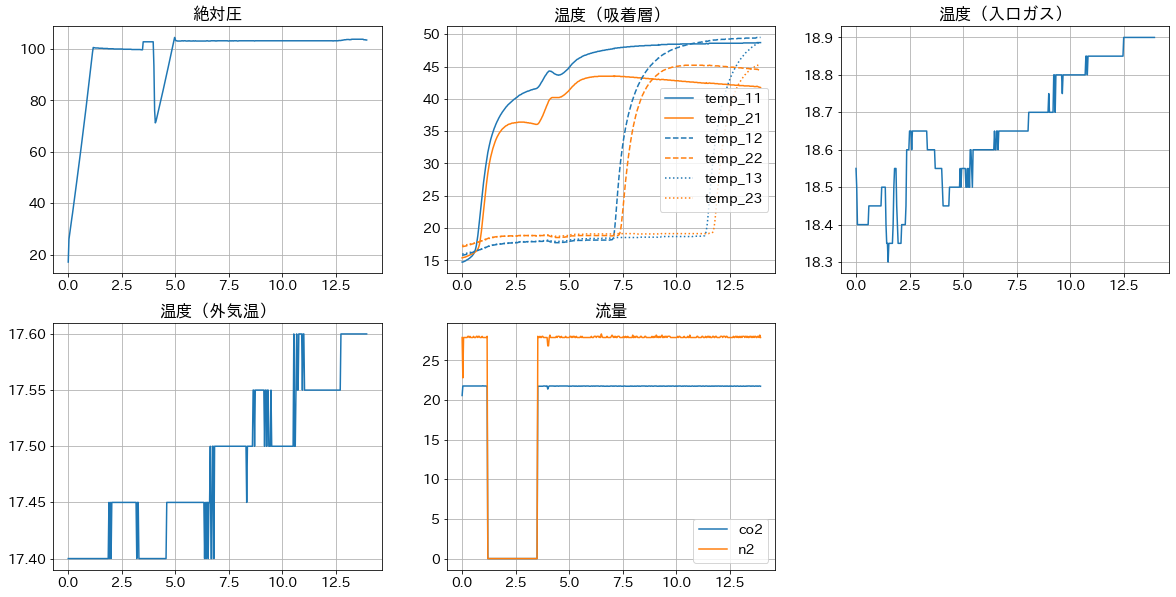

In [14]:
# 可視化
plt.rcParams["font.size"] = 14

plt.figure(figsize=(20,10))
plt.subplot(231)
plt.plot(df["Pressure"])
plt.title("絶対圧")
plt.grid()
plt.subplot(232)
plt.plot(df["temp_001_001"], label="temp_11", c="tab:blue", linestyle="-")
plt.plot(df["temp_002_001"], label="temp_21", c="tab:orange", linestyle="-")
plt.plot(df["temp_001_002"], label="temp_12", c="tab:blue", linestyle="--")
plt.plot(df["temp_002_002"], label="temp_22", c="tab:orange", linestyle="--")
plt.plot(df["temp_001_003"], label="temp_13", c="tab:blue", linestyle=":")
plt.plot(df["temp_002_003"], label="temp_23", c="tab:orange", linestyle=":")
plt.title("温度（吸着層）")
plt.legend()
plt.grid()
plt.subplot(233)
plt.plot(df["temp_inflow"])
plt.title("温度（入口ガス）")
plt.grid()
plt.subplot(234)
plt.plot(df["temp_out"])
plt.title("温度（外気温）")
plt.grid()
plt.subplot(235)
plt.plot(df[["flow_rate_co2", "flow_rate_n2"]], label=["co2", "n2"])
plt.legend()
plt.title("流量")
plt.grid()

plt.show()